In [1]:
import pandas as pd
import numpy as np

## Frequent category imputation

In [2]:
df = pd.read_csv(r"C:\Users\NEHA1\Documents\data science\Feature engineering\house price.csv")

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df = pd.read_csv(r"C:\Users\NEHA1\Documents\data science\Feature engineering\house price.csv", usecols =['BsmtQual', 'FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [6]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [8]:
df.isnull().mean().sort_values(ascending = True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [16]:
##compute the fequency with every feature

df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values()

BsmtQual
Fa     35
Ex    121
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<Axes: xlabel='BsmtQual'>

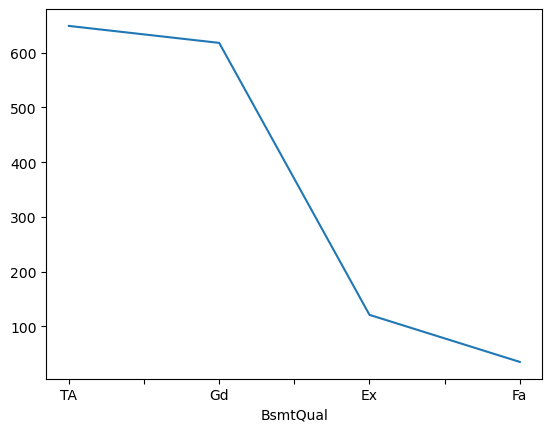

In [17]:
df.BsmtQual.value_counts().plot()

<Axes: xlabel='GarageType'>

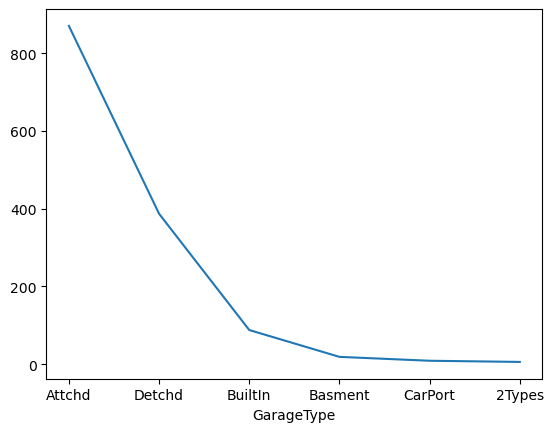

In [18]:
df.GarageType.value_counts().plot()

<Axes: xlabel='FireplaceQu'>

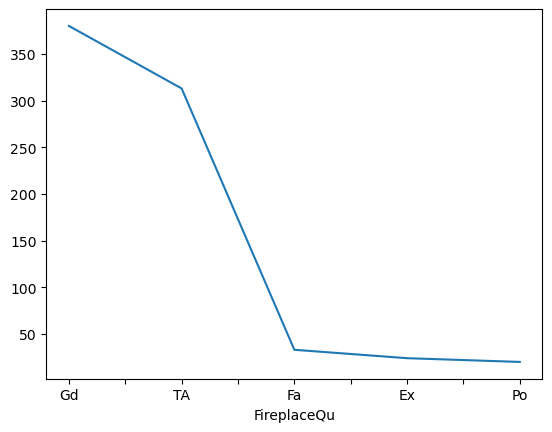

In [19]:
df.FireplaceQu.value_counts().plot()

In [28]:
df.GarageType.value_counts().index[0]

'Attchd'

In [29]:
# replacing function (we can use mode also)

def impute_nan(df, variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category, inplace = True)
    

In [32]:
for feature in ['BsmtQual', 'FireplaceQu','GarageType']:
    impute_nan(df, feature)
    

In [33]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [34]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [35]:
# we can use mode also 

df.GarageType.mode()[0]

'Attchd'

## adding a variable to capture nan

In [39]:
df = pd.read_csv(r"C:\Users\NEHA1\Documents\data science\Feature engineering\house price.csv", usecols =['BsmtQual', 'FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [40]:
df['BsmtQual_var']= np.where(df['BsmtQual'].isnull(),1,0)
df.head(50)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [41]:
frequent =df.BsmtQual.mode()[0]

In [43]:
df['BsmtQual'].fillna(frequent, inplace = True)

In [44]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [45]:
df['FireplaceQu_var']= np.where(df['FireplaceQu'].isnull(),1,0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent, inplace = True)

In [46]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0,0
1456,Gd,TA,Attchd,210000,0,0
1457,TA,Gd,Attchd,266500,0,0
1458,TA,Gd,Attchd,142125,0,1


## suppose if you have more frequent categories , we just replace NAN with a new category


In [47]:
df = pd.read_csv(r"C:\Users\NEHA1\Documents\data science\Feature engineering\house price.csv", usecols =['BsmtQual', 'FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [48]:
def impute_nan(df,variable):
    df[variable+'_newvar']= np.where(df[variable].isnull(),'Missing', df[variable])
    
for feature in ['BsmtQual', 'FireplaceQu','GarageType']:
    impute_nan(df, feature)

In [49]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [57]:
df.drop(['BsmtQual', 'FireplaceQu','GarageType'], inplace = True, axis = 1)

In [58]:
df

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd


## One Hot Encoding

In [1]:
import pandas as pd
import numpy as np

df= pd.read_csv(r"C:\Users\NEHA1\Documents\data science\Feature engineering\Titanic-Dataset.csv", usecols= ['Sex', 'Fare'])

In [2]:
df

,Sex,Fare
0,male,7.2500
1,female,71.2833
2,female,7.9250
3,female,53.1000
4,male,8.0500
...,...,...
886,male,13.0000
887,female,30.0000
888,female,23.4500
889,male,30.0000


In [4]:
pd.get_dummies(df, drop_first=True)

,Fare,Sex_male
0,7.2500,True
1,71.2833,False
2,7.9250,False
3,53.1000,False
4,8.0500,True
...,...,...
886,13.0000,True
887,30.0000,False
888,23.4500,False
889,30.0000,True


In [5]:

df= pd.read_csv(r"C:\Users\NEHA1\Documents\data science\Feature engineering\Titanic-Dataset.csv", usecols= ['Embarked'])

In [6]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
df.dropna(inplace = True)

In [8]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [10]:
pd.get_dummies(df, drop_first=True)

,Embarked_Q,Embarked_S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


## one hot encoding with many categories in a feature

In [11]:
df = pd.read_csv(r"C:\Users\NEHA1\Documents\data science\Feature engineering\mercedes-benz-dataset\train.csv\train.csv", usecols = ['X0', 'X1', 'X2', 'X3','X4', 'X5','X6'])
df

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d
...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d
4205,j,o,t,d,d,aa,h
4206,ak,v,r,a,d,aa,g
4207,al,r,e,f,d,aa,l


In [13]:
df.X0.value_counts()

X0
z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
g       1
ab      1
Name: count, dtype: int64

In [14]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


In [16]:
df.X1.value_counts().head(10)

X1
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: count, dtype: int64

In [17]:
list_10= df.X1.value_counts().head(10).index
list_10=list(list_10)
list_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [18]:
for categories in list_10:
    df[categories]= np.where(df.X1==categories, 1,0)

In [19]:
df[[list_10]

,aa,s,b,l,v,r,i,a,c,o
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,1
4206,0,0,0,0,1,0,0,0,0,0
4207,0,0,0,0,0,1,0,0,0,0


## ordinal number encoding



In [20]:
import datetime 


In [24]:
today_date =datetime.datetime.today()

In [22]:
today_date

datetime.datetime(2024, 6, 14, 10, 7, 6, 304718)

In [27]:
today_date-datetime.timedelta(4)

datetime.datetime(2024, 6, 10, 10, 7, 44, 604734)

In [29]:
## list comprehension

days = [today_date-datetime.timedelta(x) for x in range(0,30)]

In [32]:
import pandas as pd
df=pd.DataFrame(days)
df.columns=['Day']
df.head()

,Day
0,2024-06-14 10:07:44.604734
1,2024-06-13 10:07:44.604734
2,2024-06-12 10:07:44.604734
3,2024-06-11 10:07:44.604734
4,2024-06-10 10:07:44.604734


In [35]:
df['Day_name']=df.Day.dt.day_name()

In [36]:
df

,Day,Day_name
0,2024-06-14 10:07:44.604734,Friday
1,2024-06-13 10:07:44.604734,Thursday
2,2024-06-12 10:07:44.604734,Wednesday
3,2024-06-11 10:07:44.604734,Tuesday
4,2024-06-10 10:07:44.604734,Monday
5,2024-06-09 10:07:44.604734,Sunday
6,2024-06-08 10:07:44.604734,Saturday
7,2024-06-07 10:07:44.604734,Friday
8,2024-06-06 10:07:44.604734,Thursday
9,2024-06-05 10:07:44.604734,Wednesday


In [40]:
dict ={'Monday':1,'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5,'Saturday':6,'Sunday':7 }

In [41]:
dict

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [43]:
df['Day_name_ordinal']=df['Day_name'].map(dict)

In [44]:
df

,Day,Day_name,Day_name_ordinal
0,2024-06-14 10:07:44.604734,Friday,5
1,2024-06-13 10:07:44.604734,Thursday,4
2,2024-06-12 10:07:44.604734,Wednesday,3
3,2024-06-11 10:07:44.604734,Tuesday,2
4,2024-06-10 10:07:44.604734,Monday,1
5,2024-06-09 10:07:44.604734,Sunday,7
6,2024-06-08 10:07:44.604734,Saturday,6
7,2024-06-07 10:07:44.604734,Friday,5
8,2024-06-06 10:07:44.604734,Thursday,4
9,2024-06-05 10:07:44.604734,Wednesday,3


## Count or frequency Encoding

In [3]:
import pandas as pd
import numpy as np
import datetime


df = pd.read_csv(r'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, index_col=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
columns = [1,3,5,6,7,8,9,13]

In [5]:
df=df[columns]

In [6]:
df

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [7]:
df.columns=['Employment','Degree','Status','Designation','Family_job','Race','Sex','Country']

In [8]:
df

,Employment,Degree,Status,Designation,Family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [10]:
df['Employment'].value_counts()

Employment
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [11]:
for feature in df.columns[:]:
    print(feature,':',len(df[feature].unique()), 'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
Family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [14]:
country_map =df.Country.value_counts().to_dict()

In [17]:
df['Country'] =df.Country.map(country_map)
df.head(20)

,Employment,Degree,Status,Designation,Family_job,Race,Sex,Country,country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170,29170


## target guided ordinal encoding

1. ordering the labels according to the target 
2. Replace the labels by the joint probablity of being 1 or 0


In [19]:
df = pd.read_csv(r"C:\Users\NEHA1\Documents\data science\Feature engineering\Titanic-Dataset.csv", usecols=['Cabin','Survived'])
df

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN
...,...,...
886,0,NaN
887,1,B42
888,0,NaN
889,1,C148


In [20]:
df['Cabin'].fillna('Missing', inplace =True)

In [21]:
df

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing
...,...,...
886,0,Missing
887,1,B42
888,0,Missing
889,1,C148


In [22]:
df['Cabin']=df.Cabin.astype(str).str[0]

In [23]:
df

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M
...,...,...
886,0,M
887,1,B
888,0,M
889,1,C


In [24]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [31]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [32]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [33]:
ordinal_labels = df.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [34]:
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [36]:
ordinal_labels2= {k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [37]:
df['Cabin_ordinal_labels']=df.Cabin.map(ordinal_labels2)
df

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1
...,...,...,...
886,0,M,1
887,1,B,6
888,0,M,1
889,1,C,4


## mean encoding

its leads to overfitting

In [39]:
mean_ordinal =df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [40]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [41]:
df['mean_encode']= df.Cabin.map(mean_ordinal)

In [42]:
df

,Survived,Cabin,Cabin_ordinal_labels,mean_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854
...,...,...,...,...
886,0,M,1,0.299854
887,1,B,6,0.744681
888,0,M,1,0.299854
889,1,C,4,0.593220


## probablity Ratio Encoding


1. Probablity of Survived based on Cabin --- Categorical feature
2. Probablity of died(not survived) --- 1 - pr(Survived)
3. pr(survived)/pr(died)
4. Dictonary to map Cabin with probablity
5. replace with the categoriacl feature

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\NEHA1\Documents\data science\Feature engineering\Titanic-Dataset.csv", usecols=['Cabin','Survived'])
df

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN
...,...,...
886,0,NaN
887,1,B42
888,0,NaN
889,1,C148


In [2]:
df['Cabin'].fillna('Missing', inplace= True)

In [3]:
df

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing
...,...,...
886,0,Missing
887,1,B42
888,0,Missing
889,1,C148


In [5]:
df['Cabin']=df.Cabin.astype(str).str[0]

In [6]:
df

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M
...,...,...
886,0,M
887,1,B
888,0,M
889,1,C


In [7]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [10]:
prob_df =df.groupby(['Cabin'])['Survived'].mean()

In [11]:
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [12]:
prob_df['Died']= 1-prob_df['Survived']

In [13]:
prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [15]:
prob_df['Prob_ratio']= prob_df['Survived']/prob_df['Died']

In [16]:
prob_df

,Survived,Died,Prob_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000
F,0.615385,0.384615,1.600000
G,0.500000,0.500000,1.000000
M,0.299854,0.700146,0.428274
T,0.000000,1.000000,0.000000


In [18]:
prob_encoded= prob_df['Prob_ratio'].to_dict()

In [20]:
prob_encoded

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [21]:
df['Cabin_encoded']= df['Cabin'].map(prob_encoded)

In [22]:
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
